<div style="background-color:#e0f7fa; border-left: 8px solid #00796b; padding: 20px; margin: 20px 0; border-radius: 8px;">
    <h1 style="text-align:center; color:#004d40; font-size: 28px; margin-bottom: 10px;">Applied Analytics Task: RFM Analysis vs PCA</h1>
    <h3 style="text-align:center; color:#00695c;">June 26, 2025</h3>
    <hr style="border-top: 1px solid #004d40;">
    <p style="font-size: 16px; line-height: 1.5; color:#333;">
    This assignment involves applying two important customer analytics techniques: <b>RFM (Recency, Frequency, Monetary) Analysis</b> and <b>Principal Component Analysis (PCA) </b> to a transactional dataset of customer purchases. The task is to perform each method separately, interpret their results, and evaluate which technique is more effective for segmenting customers based on their purchasing behavior.
    </p>
    <p style="font-size: 16px; color:#555;"><b>Contributors:</b> Sanuja Vihanga Senadeera, Naveen Karan Krishna, Thi Anh Tram Le, Mayra Geraldine Reinoso Varon, Justin Kyle Pedro</p>
</div>


<div style="background-color: #e0f7fa; padding: 15px; border-radius: 8px;">

Markdown with this color is the explanation of code

<div style="background-color: #f1f8e9; padding: 15px; border-radius: 8px;">

Markdown with this color is the explanation/interpretation of result

<div style="background-color:#f1f8e9; border-left: 6px solid #689f38; padding: 15px 20px; margin: 15px 0; border-radius: 6px;">
    <h2 style="color:#33691e; margin-top:0;">1. Import libraries</h2>
</div>

In [321]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')    # ignor warning message

<div style="background-color: #e0f7fa; padding: 15px; border-radius: 8px;">

This code imports libraries needed for data analysis, visualization, and machine learning:

- `pandas` and `numpy`: For handling and manipulating data.

- `matplotlib.pyplot` and `seaborn`: For creating visualizations and plots.

- `StandardScaler`: To normalize data before clustering or PCA.

- `PCA`: For reducing dimensionality while keeping important information.

- `KMeans`: For clustering similar data points into groups.

These tools are commonly used together in tasks like customer segmentation, RFM analysis, or pattern discovery.

<div style="background-color:#f1f8e9; border-left: 6px solid #689f38; padding: 15px 20px; margin: 15px 0; border-radius: 6px;">
    <h2 style="color:#33691e; margin-top:0;">2. Data Cleaning & Feature Engineering</h2>
</div>

### 2.1 Loading the data

In [326]:
flo_df = pd.read_csv("flo_data_20k.csv")

# Preview the dataset
flo_df.head()

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.0,1.0,139.99,799.38,[KADIN]
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.0,2.0,159.97,1853.58,"[ERKEK, COCUK, KADIN, AKTIFSPOR]"
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.0,2.0,189.97,395.35,"[ERKEK, KADIN]"
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1.0,1.0,39.99,81.98,"[AKTIFCOCUK, COCUK]"
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,2019-08-03,2021-03-07,2021-03-07,2019-08-03,1.0,1.0,49.99,159.99,[AKTIFSPOR]


<div style="background-color: #e0f7fa; padding: 15px; border-radius: 8px;">

This code does the following:

- Loads the dataset `flo_data_20k.csv` into a DataFrame called `flo_df` using `pandas`.

- Displays the first five rows of the dataset with `.head()` to get a quick look at the data’s structure and values.

### 2.2 Inspect the DataFrame

In [330]:
#Inspect
print("Initial shape:", flo_df.shape)
print(flo_df.isna().sum())

Initial shape: (19945, 12)
master_id                            0
order_channel                        0
last_order_channel                   0
first_order_date                     0
last_order_date                      0
last_order_date_online               0
last_order_date_offline              0
order_num_total_ever_online          0
order_num_total_ever_offline         0
customer_value_total_ever_offline    0
customer_value_total_ever_online     0
interested_in_categories_12          0
dtype: int64


<div style="background-color: #e0f7fa; padding: 15px; border-radius: 8px;">

This code inspects the dataset for structure and missing values:

- `flo_df.shape` prints the number of rows and columns in the dataset.

- `flo_df.isna().sum()` counts missing (NaN) values in each column.

It helps you understand the dataset size and whether any cleaning is needed.

### 2.3 Drop Duplicates

In [334]:
#Drop duplicates 
flo_df = flo_df.drop_duplicates()
print("After dropping duplicates shape:", flo_df.shape)

After dropping duplicates shape: (19945, 12)


<div style="background-color: #e0f7fa; padding: 15px; border-radius: 8px;">

This code removes duplicate rows from the dataset:

- `drop_duplicates()` deletes any repeated records in `flo_df`.

- The updated shape (rows, columns) is printed to show how many duplicates were removed, if any.

### 2.4 Remove negative or zero spend

In [338]:
#Remove negative or zero spend
flo_df = flo_df[
    (flo_df['customer_value_total_ever_offline'] > 0) & 
    (flo_df['customer_value_total_ever_online'] > 0)
]

print("Cleaned shape:", flo_df.shape)

Cleaned shape: (19945, 12)


<div style="background-color: #e0f7fa; padding: 15px; border-radius: 8px;">

This code filters out customers with zero or negative spending:

- It keeps only rows where both offline and online spending are greater than 0.

- The updated dataset (`flo_df`) now contains only active, revenue-generating customers.

- The final shape is printed to show how many rows remain after cleaning.

### 2.5 Convert date columns to datetime

In [342]:
# Convert date columns to datetime
date_columns = ["first_order_date", "last_order_date", "last_order_date_online", "last_order_date_offline"]
for columns in date_columns:
    flo_df[columns] = pd.to_datetime(flo_df[columns])

#Checking the change
flo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19945 entries, 0 to 19944
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   master_id                          19945 non-null  object        
 1   order_channel                      19945 non-null  object        
 2   last_order_channel                 19945 non-null  object        
 3   first_order_date                   19945 non-null  datetime64[ns]
 4   last_order_date                    19945 non-null  datetime64[ns]
 5   last_order_date_online             19945 non-null  datetime64[ns]
 6   last_order_date_offline            19945 non-null  datetime64[ns]
 7   order_num_total_ever_online        19945 non-null  float64       
 8   order_num_total_ever_offline       19945 non-null  float64       
 9   customer_value_total_ever_offline  19945 non-null  float64       
 10  customer_value_total_ever_online  

<div style="background-color: #e0f7fa; padding: 15px; border-radius: 8px;">

This code converts specific columns to datetime format:

- The `date_columns` list contains column names with date values stored as text.

- The `for` loop applies `pd.to_datetime()` to each, converting them to proper `datetime` objects.

- This enables accurate time-based operations (like calculating recency).

- `flo_df.info()` confirms the change by showing updated data types.

<div style="background-color:#f1f8e9; border-left: 6px solid #689f38; padding: 15px 20px; margin: 15px 0; border-radius: 6px;">
    <h2 style="color:#33691e; margin-top:0;">3. RFM Analysis</h2>
</div>

### 3.1 Set reference date

In [347]:
# Set reference date for Recency calculation
reference_date = flo_df['last_order_date'].max() + pd.Timedelta(days=1)
print("The reference date is", reference_date)

The reference date is 2021-05-31 00:00:00


<div style="background-color: #e0f7fa; padding: 15px; border-radius: 8px;">

This code sets a reference date for calculating customer Recency:

- It takes the most recent purchase date (`last_order_date.max()`).

- Adds 1 day using `pd.Timedelta` to define a consistent point in time for recency calculation.

- This reference date is printed and will be used to measure how many days ago each customer last purchased.

### 3.2 Compute Recency, Frequency, Monetary per customer

In [351]:
# Compute Recency, Frequency, Monetary per customer

rfm_flo = flo_df.copy()
rfm_flo['Recency'] = (reference_date - rfm_flo['last_order_date']).dt.days
rfm_flo['Frequency'] = rfm_flo['order_num_total_ever_online'] + rfm_flo['order_num_total_ever_offline']
rfm_flo['Monetary'] = rfm_flo['customer_value_total_ever_online'] + rfm_flo['customer_value_total_ever_offline']

<div style="background-color: #e0f7fa; padding: 15px; border-radius: 8px;">

This code computes the RFM metrics for each customer:

- `Recency`: Number of days since the last purchase (difference between `reference_date` and `last_order_date`).

- `Frequency`: Total number of orders (online + offline).

- `Monetary`: Total customer spending (online + offline).

These values are added to a copy of the dataset (`rfm_flo`) and are essential for RFM analysis, which helps segment customers by behavior and value.

In [354]:
# Keep necessary columns
rfm_flo = rfm_flo[['master_id', 'Recency', 'Frequency', 'Monetary']]

<div style="background-color: #e0f7fa; padding: 15px; border-radius: 8px;">

This code keeps only the essential columns for RFM analysis:

- `master_id`: Unique customer ID.

- `Recency`, `Frequency`, `Monetary`: The calculated RFM metrics.

It simplifies the dataset `rfm_flo` by removing unnecessary columns and focusing only on what's needed for segmentation.

In [357]:
# RFM Scoring (1-5)
# Quintile scores: Recency reversed
rfm_flo['R_score'] = pd.qcut(rfm_flo['Recency'], 5, labels=[5,4,3,2,1])
rfm_flo['F_score'] = pd.qcut(rfm_flo['Frequency'].rank(method="first"), 5, labels=[1,2,3,4,5])
rfm_flo['M_score'] = pd.qcut(rfm_flo['Monetary'], 5, labels=[1,2,3,4,5])

# Combine into a single RFM score
rfm_flo['RFM_Score'] = rfm_flo[['R_score','F_score','M_score']].sum(axis=1)

rfm_flo.head()

,master_id,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_Score
0,cc294636-19f0-11eb-8d74-000d3a38a36f,94,5.0,939.37,3,4,4,11
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,104,21.0,2013.55,3,5,5,13
2,69b69676-1a40-11ea-941b-000d3a38a36f,185,5.0,585.32,2,4,3,9
3,1854e56c-491f-11eb-806e-000d3a38a36f,134,2.0,121.97,3,1,1,5
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,85,2.0,209.98,3,1,1,5


<div style="background-color: #e0f7fa; padding: 15px; border-radius: 8px;">

This code assigns RFM scores (1–5) to each customer:

- `R_score`: Based on Recency, where lower recency (more recent) gets a higher score (5).

- `F_score`: Based on Frequency rank where more orders = higher score.

- `M_score`: Based on Monetary value where higher spending = higher score.

Then, it sums these scores to get a total `RFM_Score`, used for customer segmentation.

Finally, it shows the top rows with the new scores using `.head()`.

### 3.3 Define segment customers on RFM Score 

In [361]:
#Segment Boundaries (Quantile-Based)

# Calculate 33rd and 66th percentiles (for 3 equal groups)
low_cutoff = rfm_flo['RFM_Score'].quantile(0.33)    # ~33% of customers
mid_cutoff = rfm_flo['RFM_Score'].quantile(0.66)    # ~66% of customers

print (low_cutoff, mid_cutoff)

7.0 11.0


<div style="background-color: #e0f7fa; padding: 15px; border-radius: 8px;">

This code calculates cutoff points to divide customers into three groups based on their total RFM scores:

- `low_cutoff`: The score at the 33rd percentile, marking the bottom third of customers.

- `mid_cutoff`: The score at the 66th percentile, marking the middle third.

These values help split customers into Low, Mid, and High value segments for further analysis or targeting.

In [364]:
# Segment customers on RFM Score
rfm_flo['Segment'] = pd.cut(
    rfm_flo['RFM_Score'],
    bins=[0,7,11,15],
    labels=['Low','Mid','High']
)

rfm_flo.head()

,master_id,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_Score,Segment
0,cc294636-19f0-11eb-8d74-000d3a38a36f,94,5.0,939.37,3,4,4,11,Mid
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,104,21.0,2013.55,3,5,5,13,High
2,69b69676-1a40-11ea-941b-000d3a38a36f,185,5.0,585.32,2,4,3,9,Mid
3,1854e56c-491f-11eb-806e-000d3a38a36f,134,2.0,121.97,3,1,1,5,Low
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,85,2.0,209.98,3,1,1,5,Low


<div style="background-color: #e0f7fa; padding: 15px; border-radius: 8px;">

This code assigns customers to segments based on their RFM scores:

- Scores between 0 and 7 → **Low** segment

- Scores between 8 and 11 → **Mid** segment

- Scores between 12 and 15 → **High** segment

It creates a new `Segment` column with these labels and shows the first few rows with `.head()`.

In [367]:
# Summary of segments
segment_summary = rfm_flo.groupby('Segment').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean',
    'master_id': 'count'
}).rename(columns={'master_id': 'CustomerCount'}).round(2)

segment_summary

,Recency,Frequency,Monetary,CustomerCount
Segment,,,,
Low,192.17,2.55,325.33,7103
Mid,126.91,4.57,674.75,7883
High,59.77,9.29,1482.90,4959


<div style="background-color: #e0f7fa; padding: 15px; border-radius: 8px;">

This code summarizes each customer segment by calculating:

- The average **Recency**, **Frequency**, and **Monetary** values per segment.

- The **number of customers** in each segment (`CustomerCount`).

- It rounds values to two decimals for clarity.

This summary helps understand the characteristics and size of each segment.

### 3.4 RFM Visualizations

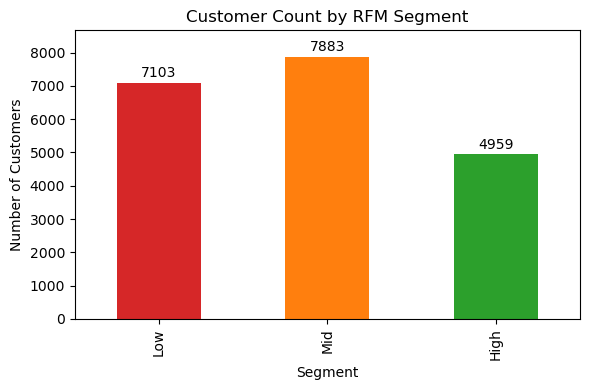

In [371]:
# Bar chart for segments

# 1. Prepare counts & colors
segment_counts = rfm_flo['Segment'].value_counts().reindex(['Low','Mid','High'])
colors = ['#d62728','#ff7f0e','#2ca02c']  # Low, Mid, High

# 2. Plot in one line, grab the Axes
ax = segment_counts.plot.bar(
    color=colors,
    figsize=(6,4),
    title='Customer Count by RFM Segment'
)

# 3. Tidy up axes
ax.set_xlabel('Segment')
ax.set_ylabel('Number of Customers')
plt.ylim(0, segment_counts.max()*1.1)   # headroom for labels

# 4. Annotate counts
for i, v in enumerate(segment_counts):
    ax.text(i, v + segment_counts.max()*0.02, str(v), ha='center')

plt.tight_layout()
plt.show()

<div style="background-color: #e0f7fa; padding: 15px; border-radius: 8px;">

This code creates a **bar chart** showing the number of customers in each RFM segment:

- It counts customers per segment (`Low`, `Mid`, `High`) and sets colors for each.

- Plots a colored bar chart with titles and axis labels.

- Adds a little space above bars to display the exact counts as text labels.

- Adjusts layout to avoid overlapping and then displays the chart.

- The chart visually compares segment sizes for easy understanding.

<div style="background-color:#f1f8e9; border-left: 6px solid #689f38; padding: 15px 20px; margin: 15px 0; border-radius: 6px;">
    <h2 style="color:#33691e; margin-top:0;"> RFM Segmentation Bar Interpretation</h2>
    <p style="font-size: 15px; line-height: 1.5; color:#333;">
    This chart indicates the number of customers in each RFM segment, Low, Mid, and High, defined by combined scores of recency (how recently a customer made a purchase), frequency (how often they make a purchase), and monetary (how much they spend).

<b>1. Mid-Value Segment (7,883 customers)</b>

* This is the largest group, comprising 39% of all customers.
* They possess medium loyalty: they purchase neither sporadically nor frequently, and their spending is moderate.
* Business implication: This is a reliable core segment of repeat business. Focused marketing initiatives in the form of tailor-made offers or small loyalty rewards could nudge them into the High-Value segment.

<b>2.Low-Value Segment (7,103 customers)</b>

* Making up approximately 35% of the base, these customers have lower frequency and amount spent, and/or haven't purchased in a very long time.
* Business implication: They are at potential risk of churn or one-off buyers.
* Reactivation strategies, like win-back emails or onboarding discounts, could win them back.

<b>3. High-Value Segment (4,959 customers)</b>
* The smallest segment, making up approximately 24% of customers, but contributing the highest percentage of revenue per customer.
* The most loyal and valuable shoppers: they shop often, spend more, and do it regularly.
* Business implication: This group deserves premium service, early access to new products, VIP status, or exclusive events, to keep and grow their loyalty.

<b>Key Takeaways</b>

* The most populated group is Mid-Value, so most customers fall into a "steady but not outstanding" purchasing habit.
* A big Low-Value group suggests reactivation potential and room for more engagement.
* The High-Value segment, the smallest, has the most revenue potential per customer and needs to be protected with tailored loyalty programs

    </p>
</div>

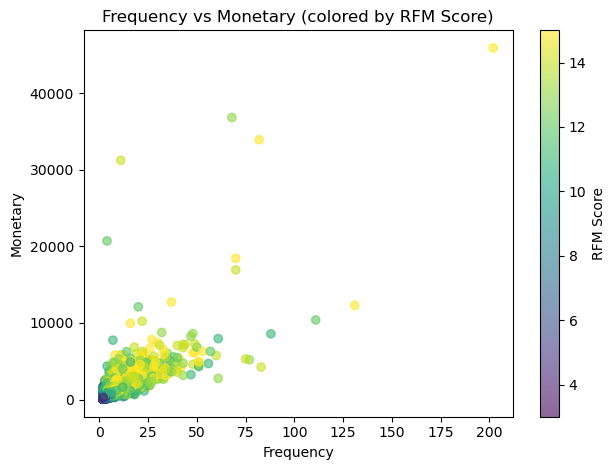

In [375]:
#2D scatter (Frequency vs Monetary)
plt.scatter(rfm_flo['Frequency'], rfm_flo['Monetary'], 
            c=rfm_flo['RFM_Score'], cmap='viridis', alpha=0.6)
plt.colorbar(label='RFM Score')
plt.xlabel('Frequency')
plt.ylabel('Monetary')
plt.title('Frequency vs Monetary (colored by RFM Score)')
plt.tight_layout()
plt.show()

<div style="background-color: #e0f7fa; padding: 15px; border-radius: 8px;">

This code creates a **2D scatter plot** showing the relationship between:

- **Frequency** (number of orders) on the x-axis,

- **Monetary** (total spending) on the y-axis.

Each point represents a customer, colored by their **RFM Score** using a color gradient (`viridis` colormap).

The color bar shows the RFM Score scale, helping to visualize how customer value relates to order frequency and spending.

<div style="background-color:#f1f8e9; border-left: 6px solid #689f38; padding: 15px 20px; margin: 15px 0; border-radius: 6px;">
    <h2 style="color:#33691e; margin-top:0;"> RFM Segmentation Scatter Interpretation</h2>
    <p style="font-size: 15px; line-height: 1.5; color:#333;">

The Monetary value vs. Frequency scatter plot, color-coded by RFM score, has a well-defined positive slope: high-frequency buyers also spend more in total. 
* Most customers cluster in the lower-left quadrant, low-frequency, low-spend customers.
* The middle band of green dots are mid-buyers
* The bright yellow dots way out on the right and top are the top customers, with extremely high order sizes and overall spend.

This gradient from dark (low value) to green (mid value) to bright yellow (high value), clinches the fact that RFM scoring does map well onto real purchase behavior: as frequency increases, monetary value goes up in almost lockstep.

</div>

<div style="background-color:#f1f8e9; border-left: 6px solid #689f38; padding: 15px 20px; margin: 15px 0; border-radius: 6px;">
    <h2 style="color:#33691e; margin-top:0;">4. PCA Analysis</h2>
</div>

In [379]:
# Original dataset

flo_df.head()

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.0,1.0,139.99,799.38,[KADIN]
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.0,2.0,159.97,1853.58,"[ERKEK, COCUK, KADIN, AKTIFSPOR]"
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.0,2.0,189.97,395.35,"[ERKEK, KADIN]"
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1.0,1.0,39.99,81.98,"[AKTIFCOCUK, COCUK]"
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,2019-08-03,2021-03-07,2021-03-07,2019-08-03,1.0,1.0,49.99,159.99,[AKTIFSPOR]


In [382]:
# Selecting only numerical columns 
features = flo_df[['order_num_total_ever_online', 'order_num_total_ever_offline', 'customer_value_total_ever_offline', 'customer_value_total_ever_online']]

<div style="background-color: #e0f7fa; padding: 15px; border-radius: 8px;">

This code selects only the numerical columns related to customer orders and spending from the dataset `flo_df`:

- Online and offline **order counts**

- Online and offline **customer spending**

These selected features are likely used for further analysis like scaling, PCA & clustering.

In [385]:
# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

<div style="background-color: #e0f7fa; padding: 15px; border-radius: 8px;">

This code standardizes the selected numerical features:

- `StandardScaler()` scales data to have a mean of 0 and standard deviation of 1.

- `fit_transform()` learns the scaling parameters from features and applies the transformation.

- The result, `X_scaled`, is the normalized data ready for algorithms like PCA or clustering, which perform better on standardized data.

In [388]:
# Sets up the PCA object

pca=PCA(n_components=2)
pcs = pca.fit_transform(X_scaled)

# Adding PCA to the dataframe

pca_flo = flo_df.copy()
pca_flo['PC1'] = pcs[:,0]
pca_flo['PC2'] = pcs[:,1]

<div style="background-color: #e0f7fa; padding: 15px; border-radius: 8px;">

This code performs **Principal Component Analysis (PCA)** to reduce data dimensions:

- Creates a PCA object to reduce to **2 components** (`n_components=2`).

- Applies PCA on the standardized features (`X_scaled`), producing two new variables (`pcs`).

- Copies the original DataFrame to `pca_flo`.

- Adds the two principal components as new columns (`PC1` and `PC2`) for each customer, capturing most of the data’s variation in just two dimensions.

In [391]:
# Keep necessary columns
pca_flo = pca_flo[['master_id', 'order_num_total_ever_online', 'order_num_total_ever_offline', 'customer_value_total_ever_offline', 'customer_value_total_ever_online', 'PC1', 'PC2']]

pca_flo.head()

,master_id,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,PC1,PC2
0,cc294636-19f0-11eb-8d74-000d3a38a36f,4.0,1.0,139.99,799.38,0.242989,-0.664321
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,19.0,2.0,159.97,1853.58,3.631123,-1.172974
2,69b69676-1a40-11ea-941b-000d3a38a36f,3.0,2.0,189.97,395.35,-0.132959,-0.089835
3,1854e56c-491f-11eb-806e-000d3a38a36f,1.0,1.0,39.99,81.98,-0.891833,-0.606330
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,1.0,1.0,49.99,159.99,-0.821630,-0.600227


<div style="background-color: #e0f7fa; padding: 15px; border-radius: 8px;">

This code keeps only the important columns in the `pca_flo` DataFrame:

- Customer ID (`master_id`)

- Original order and spending columns (online/offline)

- The two new PCA components (`PC1`, `PC2`)

It simplifies the dataset to focus on features and the reduced dimensions for further analysis or visualization. Then it shows the first few rows with `.head()`.

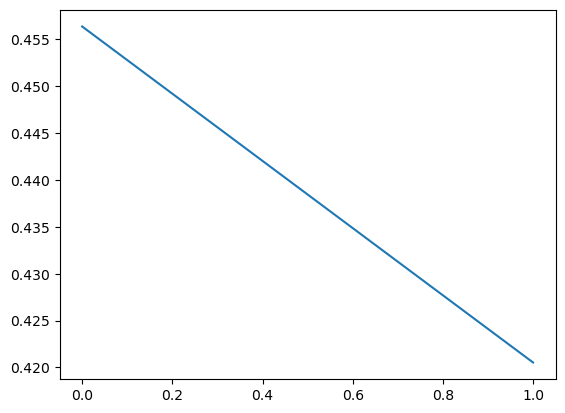

In [394]:
# Plot the variance explained by each component
plt.plot(pca.explained_variance_ratio_)

<div style="background-color: #e0f7fa; padding: 15px; border-radius: 8px;">

This code plots the **explained variance ratio** from PCA:

- `pca.explained_variance_ratio_` shows how much of the total variance each principal component captures.

- The line plot helps visualize how well the components represent the original data.

It’s useful to check if using 2 components captures enough information or if more are needed.

In [397]:
pca.explained_variance_ratio_   #tells me how much the total variance in the data set 

array([0.45637786, 0.4205302 ])

<div style="background-color:#f1f8e9; border-left: 6px solid #689f38; padding: 15px 20px; margin: 15px 0; border-radius: 6px;">
    <p style="font-size: 15px; line-height: 1.5; color:#333;">

These values represent the proportion of total variance in the original dataset that is explained by each principal component (PC). So:

* PC1 explains ~45.64% of the total variance.
* PC2 explains ~42.05% of the total variance.

These two components explain ~87.7% of the total variance in the data, meaning that the PCA effectively reduces dimensionality while preserving most of the original information.

</div>

### 4.1 PCA Visualization

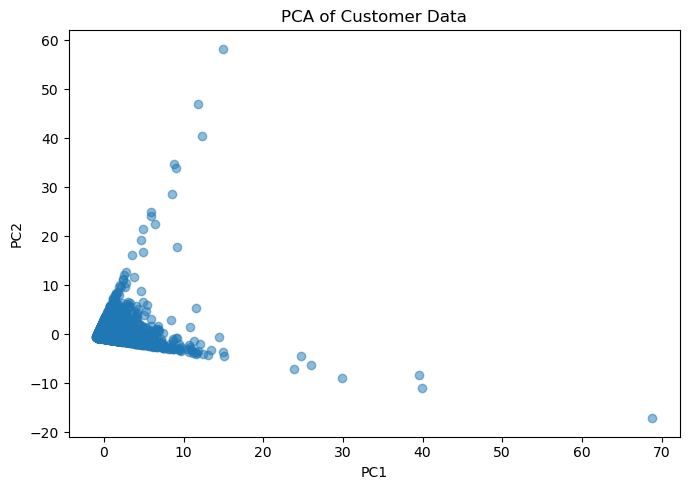

In [401]:
# Plot
plt.figure(figsize=(7,5))
plt.scatter(pca_flo['PC1'], pca_flo['PC2'], alpha=0.5)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA of Customer Data')
plt.tight_layout()
plt.show()

<div style="background-color: #e0f7fa; padding: 15px; border-radius: 8px;">

This code creates a scatter plot of customers based on their two principal components from PCA:

- `PC1` on the x-axis and `PC2` on the y-axis.

- Each point represents a customer, showing how they are distributed in the reduced 2D space.

- `alpha=0.5` makes the points semi-transparent to reduce overlap.

- It helps visualize **patterns, groupings, or spread** in customer behavior after dimensionality reduction.

<div style="background-color:#f1f8e9; border-left: 6px solid #689f38; padding: 15px 20px; margin: 15px 0; border-radius: 6px;">
    <h2 style="color:#33691e; margin-top:0;">5. PCA Clusters</h2>
</div>

<div style="background-color:#f1f8e9; border-left: 6px solid #689f38; padding: 15px 20px; margin: 15px 0; border-radius: 6px;">
    <h2 style="color:#33691e; margin-top:0;"> Apply K-Means</h2>
    <p style="font-size: 15px; line-height: 1.5; color:#333;">

For consistency with the previous RFM analysis, we applied clustering on the PCA-transformed data using three clusters, representing Low, Mid and High customer value segments. This allows for a meaningful comparison between both methods in indentifying similar customer groupings.

</div>

In [406]:
# Choose number of clusters ( 3 to match RFM: Low, Mid, High)
kmeans = KMeans(n_clusters=3, random_state=26)
pca_flo['PCA_Cluster'] = kmeans.fit_predict(pca_flo[['PC1', 'PC2']])
pca_flo.head()

,master_id,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,PC1,PC2,PCA_Cluster
0,cc294636-19f0-11eb-8d74-000d3a38a36f,4.0,1.0,139.99,799.38,0.242989,-0.664321,0
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,19.0,2.0,159.97,1853.58,3.631123,-1.172974,2
2,69b69676-1a40-11ea-941b-000d3a38a36f,3.0,2.0,189.97,395.35,-0.132959,-0.089835,0
3,1854e56c-491f-11eb-806e-000d3a38a36f,1.0,1.0,39.99,81.98,-0.891833,-0.606330,0
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,1.0,1.0,49.99,159.99,-0.821630,-0.600227,0


<div style="background-color: #e0f7fa; padding: 15px; border-radius: 8px;">

This code applies **K-Means clustering** to group customers based on their PCA-transformed data:

- `n_clusters=3` tells KMeans to form **3 clusters**, matching the RFM segments: **Low, Mid, High**.

- `fit_predict()` runs the clustering algorithm on `PC1` and `PC2`, assigning a cluster label to each customer.

- The result is stored in a new column, `PCA_Cluster`, and the updated data is previewed with `.head()`.

This helps identify natural groupings in the reduced data space.

### 5.1 Labeling the Clusters

In [410]:
# Merge the two DataFrames
merged_df = pd.merge(pca_flo, rfm_flo[['master_id', 'Recency', 'Frequency', 'Monetary']], on='master_id', how='left')

merged_df.head()

,master_id,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,PC1,PC2,PCA_Cluster,Recency,Frequency,Monetary
0,cc294636-19f0-11eb-8d74-000d3a38a36f,4.0,1.0,139.99,799.38,0.242989,-0.664321,0,94,5.0,939.37
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,19.0,2.0,159.97,1853.58,3.631123,-1.172974,2,104,21.0,2013.55
2,69b69676-1a40-11ea-941b-000d3a38a36f,3.0,2.0,189.97,395.35,-0.132959,-0.089835,0,185,5.0,585.32
3,1854e56c-491f-11eb-806e-000d3a38a36f,1.0,1.0,39.99,81.98,-0.891833,-0.606330,0,134,2.0,121.97
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,1.0,1.0,49.99,159.99,-0.821630,-0.600227,0,85,2.0,209.98


<div style="background-color: #e0f7fa; padding: 15px; border-radius: 8px;">

This code merges the **PCA + clustering** results with the **RFM metrics**:

- It joins `pca_flo` and a subset of `rfm_flo` (with `master_id`, `Recency`, `Frequency`, `Monetary`) using a left join on `master_id`.

- The resulting `merged_df` contains both:

    - PCA-based cluster labels (`PCA_Cluster`)

    - RFM values for each customer

This combined view allows for comparison between **RFM behavior** and **PCA-based clustering**.

In [413]:
# Summary of Clusters
segment_summary = merged_df.groupby('PCA_Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean',
    'master_id': 'count'
}).rename(columns={'master_id': 'CustomerCount'}).round(2)

segment_summary

,Recency,Frequency,Monetary,CustomerCount
PCA_Cluster,,,,
0,135.77,4.23,619.68,18712
1,152.93,55.50,6431.67,14
2,97.70,16.65,2705.55,1219


<div style="background-color: #e0f7fa; padding: 15px; border-radius: 8px;">

This code summarizes the **PCA-based clusters** by calculating for each cluster:

- **Average Recency, Frequency, and Monetary** values.

- **CustomerCount**: total number of customers in each cluster (`master_id` count).

- Results are rounded to 2 decimal places for readability.

This helps interpret how each **PCA_Cluster** behaves in terms of purchasing behavior, similar to how RFM segments were analyzed.

<div style="background-color:#f1f8e9; border-left: 6px solid #689f38; padding: 15px 20px; margin: 15px 0; border-radius: 6px;">
    <h2 style="color:#33691e; margin-top:0;"> Labeling the clusters after understanding their behavior</h2>
    <p style="font-size: 15px; line-height: 1.5; color:#333;">

From what has been obtained, it can be interpreted that:

**Cluster 1:** Related to the highest frequency, highest spend and medium recency can be considered as a very loyal and valuable client, even if not super recent. **High Value**

**Cluster 2:** Related to the most recent customers with the lowest recency they bought recently, with medium frequency and spend. **Mid Value**

**Cluster 0:** Related to the lowest frequency, lowest spend and not a bad recency, but these are infrequent and low-value buyers. **Low Value**

</div>

In [417]:
# Labeling the clusters
cluster_labels = {
    1: 'High',
    2: 'Mid',
    0: 'Low'
}

pca_flo['PCA_Segment'] = pca_flo['PCA_Cluster'].map(cluster_labels)

pca_flo.head()

,master_id,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,PC1,PC2,PCA_Cluster,PCA_Segment
0,cc294636-19f0-11eb-8d74-000d3a38a36f,4.0,1.0,139.99,799.38,0.242989,-0.664321,0,Low
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,19.0,2.0,159.97,1853.58,3.631123,-1.172974,2,Mid
2,69b69676-1a40-11ea-941b-000d3a38a36f,3.0,2.0,189.97,395.35,-0.132959,-0.089835,0,Low
3,1854e56c-491f-11eb-806e-000d3a38a36f,1.0,1.0,39.99,81.98,-0.891833,-0.606330,0,Low
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,1.0,1.0,49.99,159.99,-0.821630,-0.600227,0,Low


<div style="background-color: #e0f7fa; padding: 15px; border-radius: 8px;">

This code assigns **segment labels** to the PCA clusters:

- A dictionary `cluster_labels` maps each **cluster number** to a **meaningful name**: `'Low'`, `'Mid'`, or `'High'`.

- `.map()` is used to create a new column `PCA_Segment` in `pca_flo`, replacing numeric cluster IDs with the corresponding segment names.

This makes cluster results **easier to interpret and compare** with RFM segments.

### 5.2 Visualize the PCA Clusters

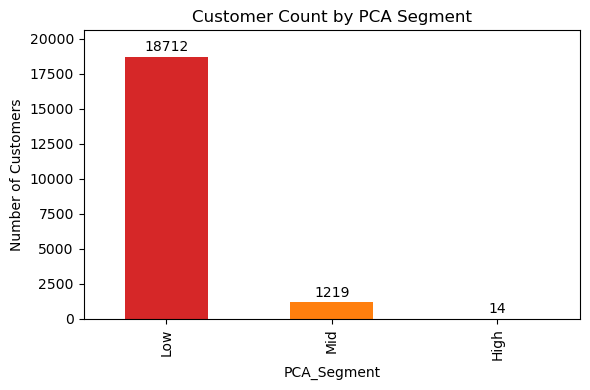

In [421]:
# Bar chart for PCA segments

# 1. Prepare counts & colors
PCAsegment_counts = pca_flo['PCA_Segment'].value_counts().reindex(['Low','Mid','High'])
colors = ['#d62728','#ff7f0e','#2ca02c']  # Low, Mid, High

# 2. Plot in one line, grab the Axes
ax = PCAsegment_counts.plot.bar(
    color=colors,
    figsize=(6,4),
    title='Customer Count by PCA Segment'
)

# 3. Tidy up axes
ax.set_xlabel('PCA_Segment')
ax.set_ylabel('Number of Customers')
plt.ylim(0, PCAsegment_counts.max()*1.1)   # headroom for labels

# 4. Annotate counts
for i, v in enumerate(PCAsegment_counts):
    ax.text(i, v + PCAsegment_counts.max()*0.02, str(v), ha='center')

plt.tight_layout()
plt.show()

<div style="background-color: #e0f7fa; padding: 15px; border-radius: 8px;">

This code creates a bar chart showing the number of customers in each **PCA-based segment**:

- **Counts** the number of customers per `PCA_Segment` (`Low`, `Mid`, `High`) and sets custom colors.

- **Plots** the bar chart with a title and labeled axes.

- **Adjusts** the y-axis to leave space above bars.

- **Adds text labels** above each bar showing the actual count.

This visual helps understand the **distribution of customers across PCA segments.**

<div style="background-color:#f1f8e9; border-left: 6px solid #689f38; padding: 15px 20px; margin: 15px 0; border-radius: 6px;">
    <h2 style="color:#33691e; margin-top:0;"> PCA Clustering Bar Interpretation</h2>
    <p style="font-size: 15px; line-height: 1.5; color:#333;">

After applying PCA for dimensionality reduction and clustering customers into three segments, the resulting groups show significant imbalance in size and customer behavior characteristics.

Cluster 0/Low is the largest group, containing 18,712 customers, and is characterized by low frequency and low monetary value, along with relatively high recency. This suggests the majority of customers in the dataset are infrequent or inactive shoppers with low recent engagement.

Cluster 1/High, on the other hand, is a very small segment with only 14 customers, but these individuals display very high purchase frequency and high spending, despite having the highest recency (152.93). This could indicate a group of outlier customers who were highly valuable but possibly haven’t interacted with the business recently.

Cluster 2/Mid includes 1,219 customers with moderate frequency, higher spending, and better recency than the other groups. This cluster may represent engaged and fairly valuable customers who are still active.

Overall, the clustering reveals a core group of low-engagement customers, a small elite group of high-value customers, and a moderately sized group with good engagement and value. However, the extreme size difference between clusters suggests that customer behavior in this dataset is highly skewed, and further analysis may be needed to ensure meaningful segmentation.

</div>

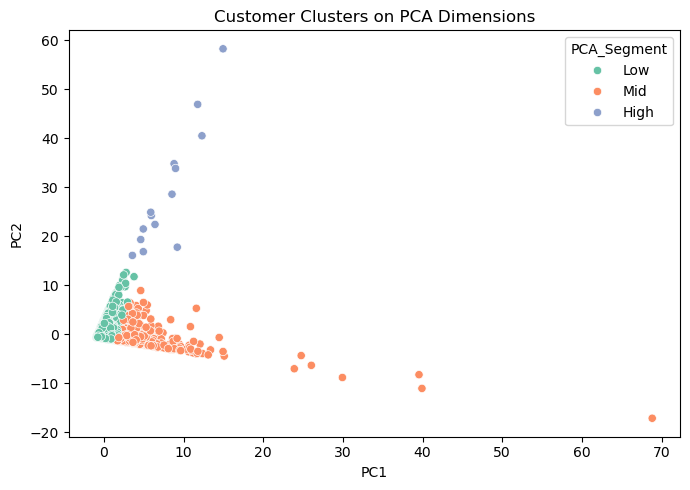

In [425]:
# Plot the scatterplot
plt.figure(figsize=(7,5))
sns.scatterplot(data=pca_flo, x='PC1', y='PC2', hue='PCA_Segment', palette='Set2')
plt.title('Customer Clusters on PCA Dimensions')
plt.tight_layout()
plt.show()

<div style="background-color: #e0f7fa; padding: 15px; border-radius: 8px;">

This code creates a **scatter plot** to visualize customer clusters based on PCA components:

- `PC1` and `PC2` are plotted on the x and y axes (from PCA).

- Points are colored by their `PCA_Segment` (Low, Mid, High) using the Set2 color palette.

- `sns.scatterplot()` makes the plot with a legend showing segment names.

- It helps you **visually understand how customer segments are grouped** in the reduced feature space.

<div style="background-color:#f1f8e9; border-left: 6px solid #689f38; padding: 15px 20px; margin: 15px 0; border-radius: 6px;">
    <h2 style="color:#33691e; margin-top:0;"> Interpretation of PCA Clustering</h2>
    <p style="font-size: 15px; line-height: 1.5; color:#333;">

The scatter plot displays customer groups by mapping them onto the first two principal components (PC1 and PC2) and each point represents a single customer. The groupings were created by unsupervised learning (K-Means) and labeled Low, Mid, and High to correspond with their relative customer value, similar to the RFM segmentation.

The Low segment (green) forms a close cluster at the origin, indicating customers with low variation in principal component scores and therefore low buying activity or involvement. These customers are more or less homogeneous in composition and form the core of the sample.

The Mid segment (orange) goes further along PC1, reflecting greater customer-behavior variability than the Low segment. The Mid segment would therefore consist of average-value customers with moderate differences in frequency or expenditure behavior.

The High segment (blue/purple) is more spread out and further along PC2, which means this segment has fewer but more extreme customers. These might be high spenders or highly active, as they show stronger deviation from the majority of the customer base.

The plot is also readily able to show good separation between segments, that is, Low and High value groups. This indicates that PCA is able to effectively reveal latent structure in the data, and clustering based on PCA dimensions provides meaningful discrimination of customer types.


</div>

<div style="background-color:#f1f8e9; border-left: 6px solid #689f38; padding: 15px 20px; margin: 15px 0; border-radius: 6px;">
    <h2 style="color:#33691e; margin-top:0;">6. Compare PCA Clusters vs RFM Segments</h2>
</div>

### 6.1 Merge the Segments

In [431]:
# Merging the datasets
comparison_df = pd.merge(rfm_flo[['master_id', 'Segment']], pca_flo[['master_id', 'PCA_Segment','PC1', 'PC2']], on='master_id')

# Previewing the merged dataset
comparison_df.head()

,master_id,Segment,PCA_Segment,PC1,PC2
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Mid,Low,0.242989,-0.664321
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,High,Mid,3.631123,-1.172974
2,69b69676-1a40-11ea-941b-000d3a38a36f,Mid,Low,-0.132959,-0.089835
3,1854e56c-491f-11eb-806e-000d3a38a36f,Low,Low,-0.891833,-0.606330
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Low,Low,-0.821630,-0.600227


<div style="background-color: #e0f7fa; padding: 15px; border-radius: 8px;">

This code merges RFM and PCA segmentation results into one DataFrame:

- Joins `rfm_flo` (with `Segment`) and `pca_flo` (with `PCA_Segment`, `PC1`, and `PC2`) on `master_id`.

- The resulting `comparison_df` lets you **compare RFM segments vs. PCA-based segments** for each customer.

- The `.head()` function previews the first few rows.

### 6.2 Create the Cross Tab (Confusion Matrix)

PCA_Segment      High         Low        Mid
Segment                                     
Low          0.000000  100.000000   0.000000
Mid          0.050742   98.185970   1.763288
High         0.201654   78.019762  21.778584


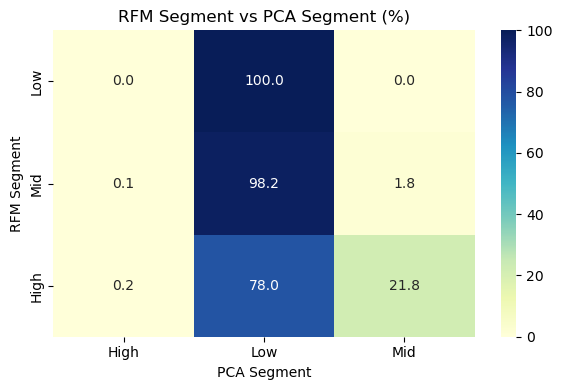

In [435]:
# Cross-tabulate
confusion = pd.crosstab(comparison_df['Segment'], comparison_df['PCA_Segment'], normalize='index') * 100

print (confusion)

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(confusion, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title('RFM Segment vs PCA Segment (%)')
plt.xlabel('PCA Segment')
plt.ylabel('RFM Segment')
plt.tight_layout()
plt.show()

<div style="background-color: #e0f7fa; padding: 15px; border-radius: 8px;">

This code compares the **RFM segments** with the **PCA-based segments** using a confusion matrix and heatmap:

- `pd.crosstab()` creates a table showing the percentage of customers in each RFM segment that fall into each PCA segment (`normalize='index'` calculates row-wise percentages).

- The heatmap visualizes these percentages with annotations, making it easy to see how closely the two segmentations align.

- Axes and title label the chart for clarity.

This helps assess the **agreement or differences** between RFM and PCA cluster groupings.

<div style="background-color:#f1f8e9; border-left: 6px solid #689f38; padding: 15px 20px; margin: 15px 0; border-radius: 6px;">
    <h2 style="color:#33691e; margin-top:0;"> Confusion Matrix interpretation </h2>
    <p style="font-size: 15px; line-height: 1.5; color:#333;">

The comparison between RFM and PCA-based segmentation reveals a notable misalignment, particularly in identifying high-value customers. While both methods agree on classifying low-value customers, evidenced by 100% of RFM-Low also being PCA-Low, the agreement significantly drops for mid and high value segments. A large portion of RFM-Mid and even 78% of RFM-High customers are placed in the PCA-Low segment, indicating that PCA may be underestimating customer value. This suggests that PCA, while useful for dimensionality reduction, may overlook important behavioral nuances captured by RFM, especially if key features such as monetary value or recency are not adequately represented in the principal components. Therefore, RFM appears to provide more interpretable and targeted segmentation for customer value analysis in this context.


</div>



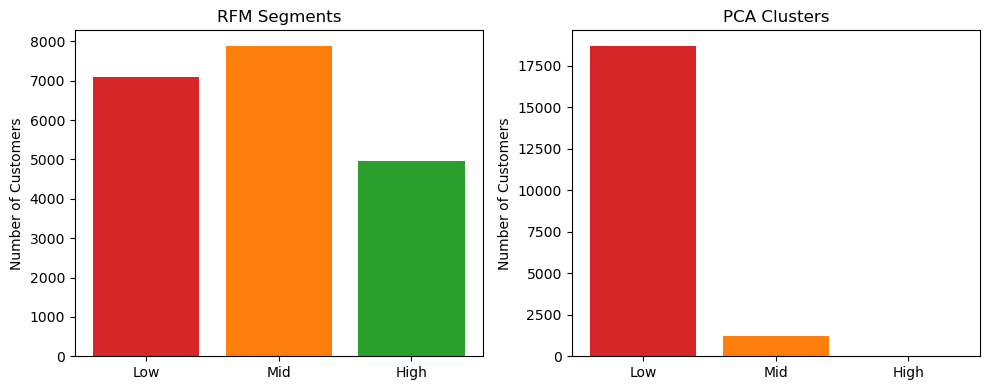

In [439]:
# Count of each segment
rfm_counts = comparison_df['Segment'].value_counts().reindex(['Low', 'Mid', 'High'])
pca_counts = comparison_df['PCA_Segment'].value_counts().reindex(['Low', 'Mid', 'High'])

# Plot
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# RFM bar chart
axes[0].bar(rfm_counts.index, rfm_counts.values, color=['#d62728', '#ff7f0e', '#2ca02c'])
axes[0].set_title('RFM Segments')
axes[0].set_ylabel('Number of Customers')

# PCA bar chart
axes[1].bar(pca_counts.index, pca_counts.values, color=['#d62728', '#ff7f0e', '#2ca02c'])
axes[1].set_title('PCA Clusters')
axes[1].set_ylabel('Number of Customers')

plt.tight_layout()
plt.show()

<div style="background-color: #e0f7fa; padding: 15px; border-radius: 8px;">

This code creates **side-by-side bar charts** to compare the number of customers in each segment from RFM and PCA clustering:

- It counts customers per segment (`Low`, `Mid`, `High`) for both methods.

- Creates two bars plots next to each other: one for RFM segments, one for PCA clusters.

- Colors match across charts for easy comparison.

- Titles and labels clearly indicate which chart corresponds to which segmentation.

- This visualizes the **distribution differences or similarities** between the two segmentations.

<div style="background-color:#f1f8e9; border-left: 6px solid #689f38; padding: 15px 20px; margin: 15px 0; border-radius: 6px;">
    <h2 style="color:#33691e; margin-top:0;"> Distribution interpretation </h2>
    <p style="font-size: 15px; line-height: 1.5; color:#333;">

The distribution of customer segments differs significantly between the RFM and PCA approaches. The RFM segmentation shows a relatively balanced distribution across Low (≈7,100), Mid (≈7,900), and High (≈5,000) value segments, suggesting that it effectively distinguishes varying levels of customer engagement and value. In contrast, the PCA clustering overwhelmingly classifies the majority of customers as Low value (≈18,500), with only a small fraction assigned to Mid and virtually none to the High segment.

This imbalance suggests that the PCA-based clustering may not be capturing the same behavioral distinctions as RFM. PCA, being a dimensionality reduction technique, might be compressing the customer features in a way that obscures the characteristics that define mid- and high-value customers. As a result, it tends to group a wide variety of behaviors into a single dominant "Low" segment. This further reinforces the insight that RFM provides a more granular and interpretable segmentation when customer value differentiation is a key objective.


</div>

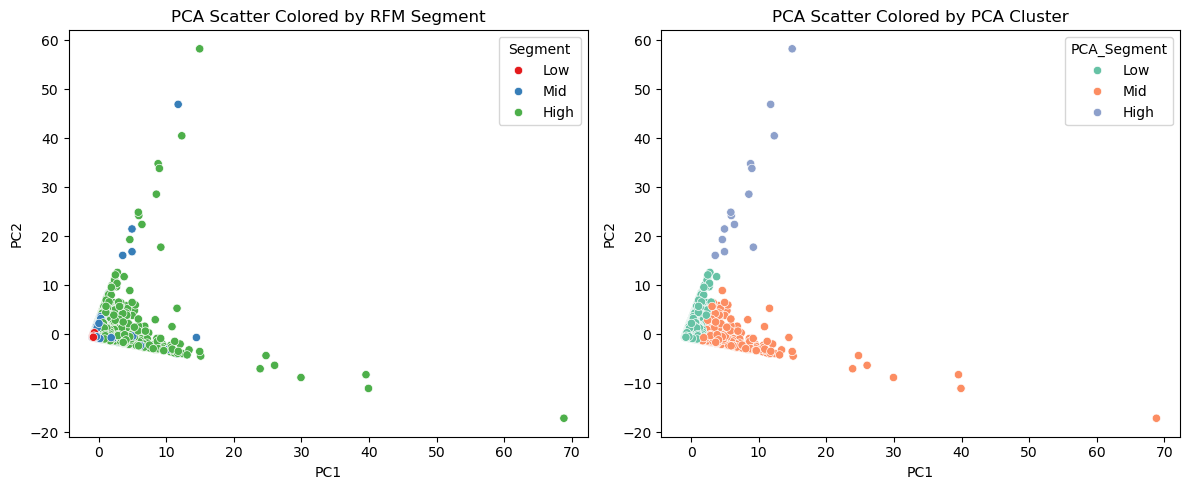

In [443]:
# Plot PCA scatter by RFM segment
plt.figure(figsize=(12, 5))

# Subplot 1: by RFM segment
plt.subplot(1, 2, 1)
sns.scatterplot(data=comparison_df, x='PC1', y='PC2', hue='Segment', palette='Set1')
plt.title('PCA Scatter Colored by RFM Segment')

# Subplot 2: by PCA cluster
plt.subplot(1, 2, 2)
sns.scatterplot(data=comparison_df, x='PC1', y='PC2', hue='PCA_Segment', palette='Set2')
plt.title('PCA Scatter Colored by PCA Cluster')

plt.tight_layout()
plt.show()

<div style="background-color: #e0f7fa; padding: 15px; border-radius: 8px;">

This code creates two side-by-side scatter plots of customers on PCA dimensions:

- Left plot: Points colored by **RFM Segment** using the `Set1` palette.

- Right plot: Points colored by **PCA Cluster** using the `Set2` palette.

Both plots use `PC1` and `PC2` as axes to visualize how customers group based on the two segmentation methods.

This comparison helps you visually assess how well the RFM and PCA clusterings match or differ.

<div style="background-color:#f1f8e9; border-left: 6px solid #689f38; padding: 15px 20px; margin: 15px 0; border-radius: 6px;">
<h2 style="color:#33691e; margin-top:0;"> Distribution interpretation </h2>
    <p style="font-size: 15px; line-height: 1.5; color:#333;">

**1. RFM Segment Distribution (Left Plot)**
* RFM-High (green) customers are spread widely along both PC1 and PC2 axes, occupying much of the space.
* RFM-Mid (blue) and especially RFM-Low (red) are tightly clustered near the origin.
* This indicates that RFM-High customers exhibit greater behavioral variability, which is captured by PCA in the spread across principal components.

**2. PCA Cluster Distribution (Right Plot)**
* PCA-Low (green) customers are tightly packed near the origin (low PC1 and PC2 values).
* PCA-Mid (orange) spreads moderately across PC1, especially in the horizontal direction.
* PCA-High (blue) customers appear only in the extreme upper PC2 region, with very few members.

**Comparison and Interpretation** 

Many RFM-High customers (green, left plot) are spread out far from the origin, reflecting their diverse behaviors. However, in the right plot, these same customers are largely labeled as PCA-Mid or even Low, meaning PCA clustering doesn’t fully recognize them as "High value."

The PCA-High segment is small and only captures a narrow part of the variance (upper PC2), while RFM classifies many more customers as High.

This confirms that PCA clustering is failing to reflect the richness and spread of behaviors seen in RFM’s High segment.

PCA’s compact Low cluster shows it’s focusing heavily on principal component compression, and possibly losing important segmentation nuances.


</div>

<div style="background-color:#f1f8e9; border-left: 6px solid #689f38; padding: 15px 20px; margin: 15px 0; border-radius: 6px;">
<h2 style="color:#33691e; margin-top:0;"> Strengths and Weaknesses of Each Technique </h2>
    <p style="font-size: 15px; line-height: 1.5; color:#333;">

<h3 style="text-align:left; color:#00695c;">RFM Analysis</h3>

**Strengths:**

* Business Interpretability: RFM (Recency, Frequency, Monetary) is intuitive and directly tied to customer value. Each component tells a meaningful story about customer behavior.
* Actionable Segments: RFM produces clearly defined Low, Mid, and High segments that marketers and managers can use to tailor promotions, retention strategies, and resource allocation.
* Balanced Distribution: The segmentation yields a fairly even spread across customer groups, ensuring all customer types are represented.

**Weaknesses:**

* Manual Thresholding: Often requires setting thresholds or binning manually, which can be subjective.
* Limited Dimensionality: Only considers three features that may miss other relevant behavioral patterns if more data is available.
* No Automatic Dimensional Reduction: May not scale well with very large or complex datasets unless combined with other techniques.

<h3 style="text-align:left; color:#00695c;">PCA-Based Clustering</h3>

**Strengths:**

* Dimensionality Reduction: PCA reduces complex, high-dimensional datasets into a few principal components, which can help uncover hidden patterns.
* Data Compression: Enables visualization of complex data in 2D plots, making patterns easier to spot visually.
* Objective Transformation: PCA uses statistical variance rather than manual rules.

**Weaknesses:**

* Loss of Interpretability: Even though PCA uses behavioral variables, it transforms them into abstract components (e.g., PC1, PC2), making the resulting segments difficult to interpret and explain in business terms.
* Ambiguous Segment Meaning: PCA clusters are formed based on statistical variance, not explicit business rules. As seen in the results, many high-value customers were misclassified as low, suggesting that meaningful distinctions were not preserved.
* Risk of Overgeneralization: The method may produce dominant segments (e.g., most customers in “Low”) that don’t reflect actual behavioral diversity.

</div>

<div style="background-color:#f1f8e9; border-left: 6px solid #689f38; padding: 15px 20px; margin: 15px 0; border-radius: 6px;">
<h2 style="color:#33691e; margin-top:0;"> Project Limitations </h2>
    <p style="font-size: 15px; line-height: 1.5; color:#333;">

**Fixed Number of Clusters**\
To enable a one-to-one comparison with RFM’s three segments, we forced PCA + clustering into exactly three clusters rather than exploring the “natural” or optimal number of clusters (e.g., via the elbow method or silhouette scores). This may have masked better subgroup structure.

**Limited Feature Set**\
Both RFM and PCA ran on just recency/frequency and spending variables. Incorporating additional features (e.g., product categories, channel preferences, demographics) might change the clustering landscape.


</div>





<div style="background-color:#f1f8e9; border-left: 6px solid #689f38; padding: 15px 20px; margin: 15px 0; border-radius: 6px;">
<h2 style="color:#33691e; margin-top:0;"> Recommendation for Business Use</h2>
    <p style="font-size: 15px; line-height: 1.5; color:#333;">

RFM analysis remains the preferred method for most customer-value use cases because:

* **Clear Business Meaning**
Each RFM segment directly maps to how recently, how often, and how much a customer buys are the metrics that marketing, sales, and customer-success teams already understand and act on. Businesses can say “Target RFM-High customers with VIP rewards” or “Re-engage RFM-Low customers with reactivation offers.”

* **Actionable Decision-Making**
Segment thresholds in RFM are explicit, so businesses know exactly which customers fall into each bucket. This makes it simple to A/B test campaigns, allocate budgets, and measure lift by segment.

* **Robustness and Flexibility**
Businesses can easily adjust RFM cut-points or expand to RFMC (adding “Churn risk” or “Customer tenure”) without re-engineering the entire process. It scales to new markets or products with minimal retraining.

* **Alignment with Business Metrics**
KPIs like “average order value,” “repeat purchase rate,” and “customer lifetime value” tie directly back to RFM scores. This helps stakeholders track performance in language they already use.

**When to Use PCA + Clustering**
PCA can still play a valuable supporting role:

* **Exploratory Analysis:** Uncover hidden patterns in high-dimensional data or visualize customer behaviors in two dimensions.

* **Feature Compression:** Preprocess large feature sets before feeding them into more advanced clustering or classification models.

* **Advanced Segmentation:** As a precursor to clustering on product-level, behavioral, or psychographic features beyond pure RFM.

For straightforward, interpretable, and actionable customer segmentation especially when business teams need clarity on “who to target and how” RFM analysis is the most appropriate. PCA-based clustering is best reserved for deeper exploratory work or when you need to reduce dozens of features into a few summary axes before applying more tailored clustering techniques.

</div>